# COVID-19 Dataset Analysis

This will be analysis of the COVID-19 dataset from https://github.com/datasets/covid-19.   
This dataset includes time series data tracking the number of people affected by COVID-19 worldwide, including:
    - Confirmed tested cases of Coronavirus infection
    - The number of people who have reportedly died while sick with Coronavirus
    - The number of people who have reportedly recovered from it


Process will be broken down into a few steps:
    - Data Collection/Cleaning
    - Data Analysis
    - Training models
    - Measuring model performance

## Data Collection / Cleaning

Using the Python Pandas Library, we are able to import the data directly from github into a dataframe containing the relevant data.

In [2]:
import pandas as pd
countries_agg_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
key_pivot_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv'
time_worldwide_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
worldwide_agg_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv'
df_countries_agg = pd.read_csv(countries_agg_url, error_bad_lines=False)
print(df_countries_agg.head())

         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
3  2020-01-22      Andorra          0          0       0
4  2020-01-22       Angola          0          0       0


## Data Analysis

First we will look at the global increase rate per day to see any overlying trends to determine if any individual country is standing out in terms of transmission risk (Either higher than usual or lower than usual). This gives a sense of how well a country is performing in the task of containment of the disease.  

The increase rate given in the data represents the % increase from the prior day to the current row. 

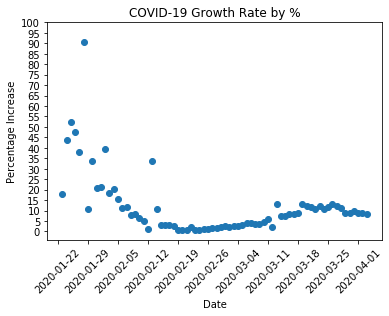

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT

df_worldwide_agg = pd.read_csv(worldwide_agg_url, error_bad_lines=False)

xticks = ['2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11', '2020-03-18', '2020-03-25', '2020-04-01']
ticklabels = ['2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11', '2020-03-18', '2020-03-25', '2020-04-01']
yticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

plt.plot_date(x = df_worldwide_agg['Date'], y = df_worldwide_agg['Increase rate'])
plt.xticks(xticks, ticklabels, rotation = 45)
plt.yticks(yticks)

plt.title('COVID-19 Growth Rate by %')
plt.xlabel('Date')
plt.ylabel('Percentage Increase')

plt.show()